In [113]:
import torch
import torch.nn.functional as F
from torch import nn
from torch.nn.parameter import Parameter
from torch.autograd import Variable
%matplotlib inline
import matplotlib.pyplot as plt

In [114]:
class linear(nn.Module):
    """ 
        Linear activation function
        
        Range: (-∞,∞)
    """
    def __init__(self,input_features,slope=None):
        """
        Parameters:
                    input_features - input features
                    slope - trainable parameter
        """
        super(linear,self).__init__()
        self.input_features=input_features
        if slope==None:
            self.slope=Parameter(torch.tensor(1.0))
        else:
            self.slope=Parameter(torch.tensor(slope))        
        self.slope.requiresGrad = True 
        
    def forward(self, x):
        """
        Parameters: 
            x: Input tensor

        Returns: 
            y: Output tensor given by f(x)= slope.x
        """
        return x*self.slope

Linear activation function with slope 1.00


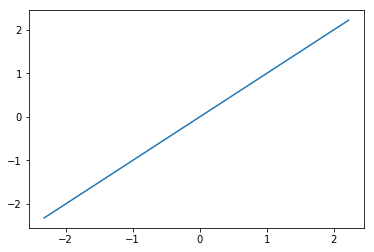

In [115]:
print("Linear activation function with slope 1.00")
x=torch.sort(torch.randn(100)).values
activation=linear(100)
y=activation(x)
plt.plot(x.numpy(),y.detach().numpy())

In [116]:
class sigmoid(nn.Module):
    """ 
            Sigmoid activation function

            Range: (0,1)
            
            Drawbacks:
            1. Sigmoids saturate and kill gradients
            2. Sigmoid outputs are not zero-centered.
    """
    def __init__(self):
        super().__init__()
        
    def forward(self, x):
        """
        Parameters: 
                x: Input tensor

        Returns: 
                y: Output tensor given by f(x) = 1/(1+exp(-x))
        """
        y=1/(1+torch.exp((-1)*x))
        return y

Sigmoid activation function


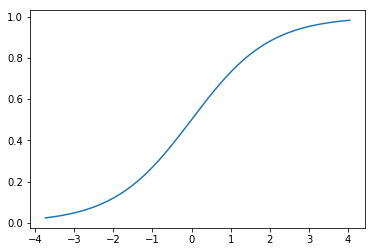

In [117]:
print("Sigmoid activation function")
x=torch.sort(torch.randn(10000)).values
activation=sigmoid()
y=activation(x)
plt.plot(x.numpy(),y.numpy())

In [118]:
class relu(nn.Module):
    """ 
            ReLU activation function

            Range: (0,∞)
    """
    def __init__(self):
        super().__init__()
        
    def forward(self, x):
        """
        Parameters: 
                x: Input tensor

        Returns: 
                y: Output tensor given by f(x) = max(0,x)
        """
        y=torch.clamp(x,0)
        return y

ReLU activation function


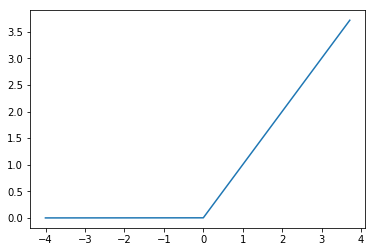

In [119]:
print("ReLU activation function")
x=torch.sort(torch.randn(10000)).values
activation=relu()
y=activation(x)
plt.plot(x.numpy(),y.numpy())

In [120]:
class leaky_relu(nn.Module):
    """ 
           Leaky ReLU activation function

           Range: (-∞,∞)
            
           Advantage:
                Prevents the problem of dying neurons in ReLU due to fragile gradients
    """
    def __init__(self,alpha=0.01):
        """
        Parameters:
            input_features - input features
            alpha - constant parameter
          
        Returns: 
            y: Output tensor given by f(x)= slope.x
        """
        super().__init__()
        self.alpha=alpha
        
    def forward(self, x):
        """
        Parameters: 
                x: Input tensor

        Returns: 
                y: Output tensor
        """
        positive_indices=torch.where(x>=0)
        negative_indices=torch.where(x<0)
        y[positive_indices]=x[positive_indices]
        y[negative_indices]=x[negative_indices]*self.alpha
        return y

Leaky ReLU activation function with alpha(negative-slope) 0.03


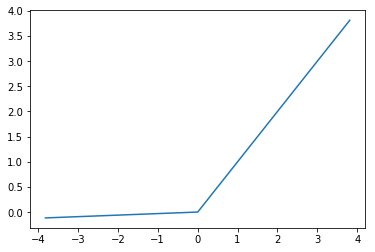

In [121]:
print("Leaky ReLU activation function with alpha(negative-slope) 0.03")
x=torch.sort(torch.randn(10000)).values
activation=leaky_relu(alpha=0.03)
y=activation(x)
plt.plot(x.numpy(),y.numpy())

In [122]:
class soft_plus(nn.Module):
    """ 
            SoftPlus activation function
         
            Range: (0,∞)
            
            Interesting note: Derivative is equal to sigmoid function
    """
    def __init__(self):
        super().__init__()
        
    def forward(self, x):
        """
        Parameters: 
                x: Input tensor

        Returns: 
                y: Output tensor given by ln (1+exp(x))
        """
        y=torch.log(1+torch.exp(x))
        return y

SoftPlus activation function


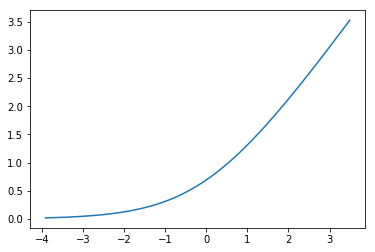

In [123]:
print("SoftPlus activation function")
x=torch.sort(torch.randn(10000)).values
activation=soft_plus()
y=activation(x)
plt.plot(x.numpy(),y.numpy())

In [124]:
class tanh(nn.Module):
    """ 
            Tanh activation function
         
            Range: (-1,1)
            
            Interesting note: It can be scaled to sigmoid as tanh(x)=2sigmoid(2x)-1
    """
    def __init__(self):
        super().__init__()
        
    def forward(self, x):
        """
        Parameters: 
                x: Input tensor

        Returns: 
                y: Output
        """
        sigma=sigmoid()
        y=2*sigma(2*x) - 1
        return y

Tanh activation function


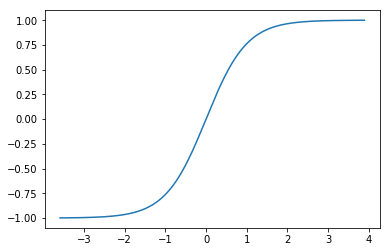

In [125]:
print("Tanh activation function")
x=torch.sort(torch.randn(10000)).values
activation=tanh()
y=activation(x)
plt.plot(x.numpy(),y.numpy())

In [126]:
class swish(nn.Module):
    """ 
            Swish activation function
         
            Range: (≈-0.278,∞)
                
            Interesting note: It is bounded below and unbounded above, so similar to ReLU
      """
    def __init__(self):
        super().__init__()
        
    def forward(self, x):
        """
            Parameters: 
                x: Input tensor

            Returns: 
                y: Output tensor given by f(x)= x * sigmoid(x)
        """
        sigma=sigmoid()
        y=x*sigma(x)
        return y

Swish activation function


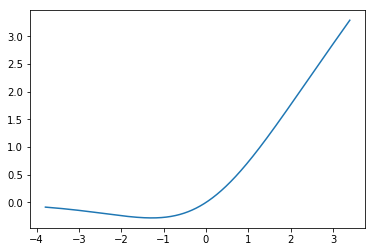

In [127]:
print("Swish activation function")
x=torch.sort(torch.randn(10000)).values
activation=swish()
y=activation(x)
plt.plot(x.numpy(),y.numpy())

In [128]:
class mish(nn.Module):
    """ 
            Mish activation function
         
            Range: (≈-0.31,∞)
                
            Interesting note: It is bounded below and unbounded above, so similar to ReLU
      """
    def __init__(self):
        super().__init__()
        
    def forward(self, x):
        """
            Parameters: 
                x: Input tensor

            Returns: 
                y: Output tensor given by f(x)= x * tanh(soft-plus(x))
        """
        Tanh=tanh()
        SoftPlus=soft_plus()
        y=x*Tanh(SoftPlus(x))
        return y

Mish activation function


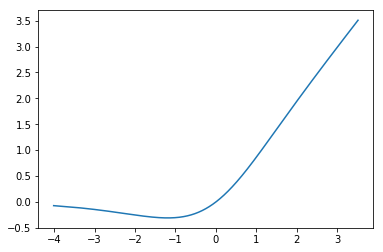

In [129]:
print("Mish activation function")
x=torch.sort(torch.randn(10000)).values
activation=mish()
y=activation(x)
plt.plot(x.numpy(),y.numpy())